# Introduction

**SymPy** is a Python library for symbolic mathematics. It aims to become a full-featured computer algebra system (CAS) while keeping the code as simple as possible in order to be comprehensible and easily extensible. SymPy is written entirely in Python.

Official site : https://www.sympy.org/en/index.html

In [1]:
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt

## Basics Mathematics

In [2]:
x = smp.symbols('x', real=True) 
x**2

x**2

In [43]:
smp.sin(x**2) / x**smp.Rational(1,3)

sin(x**2)/x**(1/3)

In [4]:
f = (x**2 + 4*x + 3)**2
f

(x**2 + 4*x + 3)**2

## Factorization

$$ (x + 1)^2 (x + 3)^2  $$

In [5]:
f.factor()

(x + 1)**2*(x + 3)**2

## Expandation

In [6]:
f.expand().

x**4 + 8*x**3 + 22*x**2 + 24*x + 9

## Simplification

In [7]:
f.simplify()

(x**2 + 4*x + 3)**2

## Solving for f(x) = 0

### Simple varaible

In [381]:
smp.solve(f, x)

[]

In [382]:
smp.solve(smp.sin(x), x)

[0, pi]

In [383]:
x = smp.symbols('x', real=False)
f = x**2 + 1
smp.solve(f, x)

[-I, I]

In [384]:
x = smp.symbols('x', real=True)
f = x**2 + 1
smp.solve(f, x)

[]

### Multi varaibles

In [12]:
x, y, z = smp.symbols('x y z', real=True) # works also  : smp.symbols('x:z') 
f = x**2 + y * smp.sin(z)
f

x**2 + y*sin(z)

In [13]:
smp.solve(f, x)

[-sqrt(-y*sin(z)), sqrt(-y*sin(z))]

In [14]:
smp.solve(f, y)

[-x**2/sin(z)]

In [15]:
z_sols = smp.solve(f, z)
z_sols

[asin(x**2/y) + pi, -asin(x**2/y)]

### System of equations

In [362]:
eq1 = x**2 - 4*y + z + 2
eq2 = x + y - z - 6
eq3 = x - y + 3*z

sols = smp.solve([eq1, eq2, eq3], [x, y, z])
sols

[(-7/2 + sqrt(173)/2, 16 - sqrt(173), 13/2 - sqrt(173)/2),
 (-sqrt(173)/2 - 7/2, sqrt(173) + 16, 13/2 + sqrt(173)/2)]

In [363]:
display(sols[0])
sols[0][0].simplify()

(-7/2 + sqrt(173)/2, 16 - sqrt(173), 13/2 - sqrt(173)/2)

-7/2 + sqrt(173)/2

### Differentiels Equiation

In [456]:
t, a, b = smp.symbols('t a b', real=True)
v = smp.symbols('v', real=True, cls=smp.Function)
v = v(t)
v

v(t)

In [457]:
dv_dt = smp.diff(v, t, 1) - v*a + b
dv_dt

-a*v(t) + b + Derivative(v(t), t)

In [458]:
diff_eq = smp.Eq(dv_dt, 0)
diff_eq

Eq(-a*v(t) + b + Derivative(v(t), t), 0)

In [467]:
smp.dsolve(diff_eq, v).doit()

Eq(v(t), C1*exp(a*t) + b/a)

## Symbolic to Numircal

In [460]:
expr = z_sols[0]
expr

asin(x**2/y) + pi

In [461]:
expr_f = smp.lambdify([x,y], expr)
expr_f

<function _lambdifygenerated(x, y)>

In [462]:
expr_f(1, 5)

3.342950574380124

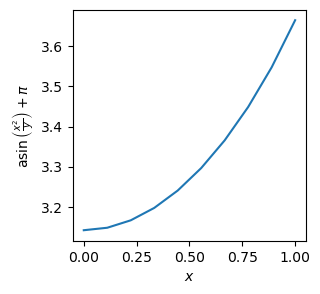

In [463]:
x_num = np.linspace(0, 1, 10)
y_num = 2
z_num = expr_f(x_num, y_num)

plt.figure(figsize=(3,3))
_ = plt.plot(x_num, z_num)
_ =plt.xlabel(f'${x}$')
_ =plt.ylabel(f'${smp.latex(expr)}$')

## Substitution

In [464]:
F = x**2 + y * smp.sin(z)
F

x**2 + y*sin(z)

In [23]:
F.subs([(y, smp.tan(z)),
       (z, y)])

x**2 + sin(y)*tan(y)

In [40]:
F.subs([(y, 4),
       (x, smp.pi)])

4*sin(z) + pi**2

# Calculus

## Limits

In [47]:
x = smp.symbols('x', real=True)
expr = smp.sin(x/2 + smp.sin(x))
expr

sin(x/2 + sin(x))

In [61]:
smp.limit(expr, x, smp.pi, dir='+')

1

In [62]:
f = ((1 + smp.sin(x)) / (1 - smp.cos(x))) ** 2
smp.limit(f, x, 0, dir='-')

oo

In [68]:
f = 2*smp.exp(1/x) / (smp.exp(1/x) + 1)
f

2*exp(1/x)/(exp(1/x) + 1)

In [70]:
f.limit(x, smp.oo, dir='-')

1

## Derivitives

### First derivative

In [71]:
f.diff(x) # smp.diff(f, x) works also

-2*exp(1/x)/(x**2*(exp(1/x) + 1)) + 2*exp(2/x)/(x**2*(exp(1/x) + 1)**2)

In [72]:
f.diff(x).simplify()

-1/(2*x**2*cosh(1/(2*x))**2)

### Nth-derivative

$$ \frac{d}{dx}\left(\frac{a+\sin x}{b-\cos x} \right)^2 $$

In [343]:
x, a, b = smp.symbols('x a b', real=True)
fxy = ((a + smp.sin(x)) / (b - smp.cos(x))) ** 2
fxy

(a + sin(x))**2/(b - cos(x))**2

In [344]:
smp.diff(fxy, x, 1)

-2*(a + sin(x))**2*sin(x)/(b - cos(x))**3 + 2*(a + sin(x))*cos(x)/(b - cos(x))**2

In [354]:
# Second derivitive
smp.diff(fxy, x, 2).simplify()

2*(-(a + sin(x))**2*(b*cos(x) + cos(2*x) - 2) - 4*(a + sin(x))*(b - cos(x))*sin(x)*cos(x) + (b - cos(x))**2*(-a*sin(x) + cos(2*x)))/(b - cos(x))**4

In [355]:
smp.diff(fxy, (x, 2), (a, 2))

-4*(cos(x) - 3*sin(x)**2/(b - cos(x)))/(b - cos(x))**3

## Abstract functions

$$ \frac{d}{dx} {f(x+g(x))}$$

In [166]:
f, g = smp.symbols('f g', cls=smp.Function)
g = g(x)
f = f(x + g)
f

f(x + g(x))

In [167]:
df_dx = f.diff(x)
df_dx

(Derivative(g(x), x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + g(x))

In [168]:
df_dx.subs([(g, smp.sin(x))])

(Derivative(sin(x), x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + sin(x))

In [169]:
df_dx.subs([(g, smp.sin(x))]).doit()

(cos(x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + sin(x))

## Integrals

### Primitive (antiderivative)

$$ \int{csc(x)cot(x)dx}$$ 

In [187]:
f = smp.csc(x) * smp.cot(x)
f

cot(x)*csc(x)

In [188]:
smp.integrate(f, x) # f.integrate(x) work also

-1/sin(x)

In [189]:
f = 4*smp.sec(3*x)*smp.tan(3*x)
f

4*tan(3*x)*sec(3*x)

In [194]:
f.integrate(x)

4/(3*cos(3*x))

In [197]:
f = (1 + smp.sqrt(x))**smp.Rational(1,3) / smp.sqrt(x)
f

(sqrt(x) + 1)**(1/3)/sqrt(x)

In [202]:
smp.integrate(f, x).simplify()

3*(sqrt(x) + 1)**(4/3)/2

### Definite Integral

In [357]:
f = smp.exp(x) / smp.sqrt(smp.exp(2*x) + 9)
f

exp(x)/sqrt(exp(2*x) + 9)

In [360]:
# Get symbolic expression
smp.integrate(f, 
              (x, 0, smp.log(4)))

-asinh(1/3) + asinh(4/3)

In [361]:
# Get Numerical value
smp.integrate(f, 
              (x, 0, smp.log(4))).evalf()

0.771162138430851

In [210]:
t = smp.symbols('t', real=True, positive=True)
f = x**10 * smp.exp(x)
f

x**10*exp(x)

In [216]:
smp.integrate(f, (x, 1, t))

(t**10 - 10*t**9 + 90*t**8 - 720*t**7 + 5040*t**6 - 30240*t**5 + 151200*t**4 - 604800*t**3 + 1814400*t**2 - 3628800*t + 3628800)*exp(t) - 1334961*E

### Improper Integrals

In [229]:
f = 16 * smp.atan(x) / (1 + x**2)
f

16*atan(x)/(x**2 + 1)

In [230]:
smp.integrate(f, (x, 0, smp.oo))

2*pi**2

## Sequences and Series

### Summation

In [231]:
n = smp.symbols('n', integer=True)

In [243]:
expr = 6 / (4**n)
expr

6/4**n

In [244]:
smp.Sum(expr, (n, 0, smp.oo))

Sum(6/4**n, (n, 0, oo))

In [245]:
smp.Sum(expr, (n, 0, smp.oo)).doit()

8

In [258]:
expr = 2**(n+1) / 5**n
expr

2**(n + 1)/5**n

In [259]:
smp.Sum(expr, (n, 0, smp.oo)).doit()

10/3

In [273]:
expr = smp.atan(n) / n**smp.Rational(11,10)
expr

atan(n)/n**(11/10)

In [274]:
smp.Sum(expr, (n, 1, smp.oo)).doit()

Sum(atan(n)/n**(11/10), (n, 1, oo))

In [285]:
smp.Sum(expr, (n, 1, smp.oo)).n()

1.969

In [308]:
expr = (1 + smp.cos(n)) / n**2
expr

(cos(n) + 1)/n**2

In [309]:
smp.Sum(expr, (n, 1, smp.oo)).doit()

Sum((cos(n) + 1)/n**2, (n, 1, oo))

In [310]:
smp.Sum(expr, (n, 1, smp.oo)).n(n=30)

1.9691

### Production

In [335]:
expr = n
expr

n

In [338]:
smp.Product(expr, (n, 1, 4)).n()

24.0000000000000